In [10]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv("Madrid 2022-02-08 to 2024-11-01.csv")
df2 = pd.read_csv("madrid 2019-04-08 to 2022-01-01.csv")
df3 =pd.read_csv("madrid 2022-01-02 to 2022-02-07.csv")
df = pd.concat([df, df2, df3], ignore_index=True)

df["preciptype"].unique()
df["icon"].unique()
df

#Categorizar la columna icon
labelencoder=LabelEncoder()
df["icono numero"]= labelencoder.fit_transform(df["icon"])
df


df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,icono numero
0,Madrid,2022-02-08,15.7,5.1,10.0,15.7,3.8,9.2,-0.3,49.7,...,6,NaN,2022-02-08T08:16:59,2022-02-08T18:41:28,0.25,Clear,Clear conditions throughout the day.,clear-day,"08221099999,08224099999,LEMD,LEVS,08226099999,...",0
1,Madrid,2022-02-09,14.6,4.9,9.5,14.6,4.1,9.2,0.6,55.3,...,6,NaN,2022-02-09T08:15:50,2022-02-09T18:42:42,0.27,Clear,Clear conditions throughout the day.,clear-day,"08221099999,08224099999,LEMD,LEVS,08226099999,...",0
2,Madrid,2022-02-10,15.5,2.9,9.0,15.5,2.9,9.0,1.6,61.4,...,6,NaN,2022-02-10T08:14:40,2022-02-10T18:43:54,0.30,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08221099999,08224099999,LEMD,LEVS,08226099999,...",2
3,Madrid,2022-02-11,16.5,4.9,10.6,16.5,4.9,10.5,2.7,60.7,...,6,NaN,2022-02-11T08:13:28,2022-02-11T18:45:07,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08221099999,08224099999,LEMD,LEVS,08226099999,...",2
4,Madrid,2022-02-12,14.6,5.9,10.3,14.6,5.8,10.2,1.7,57.4,...,6,NaN,2022-02-12T08:12:15,2022-02-12T18:46:20,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08221099999,08224099999,LEMD,LEVS,08226099999,...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,madrid,2022-02-03,16.5,2.9,9.8,16.5,2.9,9.7,1.6,57.9,...,6,NaN,2022-02-03T08:22:22,2022-02-03T18:35:21,0.07,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08221099999,08224099999,LEMD,LEVS,08226099999,...",2
2031,madrid,2022-02-04,13.2,6.6,9.5,13.2,6.6,9.4,4.2,70.4,...,5,NaN,2022-02-04T08:21:20,2022-02-04T18:36:35,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08221099999,08224099999,LEMD,LEVS,08226099999,...",2
2032,madrid,2022-02-05,14.1,7.1,9.9,14.1,5.1,9.1,2.2,60.2,...,5,NaN,2022-02-05T08:20:17,2022-02-05T18:37:48,0.14,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08221099999,08224099999,LEMD,LEVS,08226099999,...",2
2033,madrid,2022-02-06,13.6,3.3,7.9,13.6,0.8,7.0,-4.2,42.6,...,6,NaN,2022-02-06T08:19:13,2022-02-06T18:39:02,0.17,Clear,Clear conditions throughout the day.,clear-day,"08221099999,08224099999,LEMD,LEVS,08226099999,...",0


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       175
           1       0.00      0.00      0.00         2
           2       0.96      0.92      0.94       196
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00         1

    accuracy                           0.96       611
   macro avg       0.79      0.78      0.78       611
weighted avg       0.98      0.96      0.97       611



c:\Users\ia\Desktop\TrabajoTemperatura\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


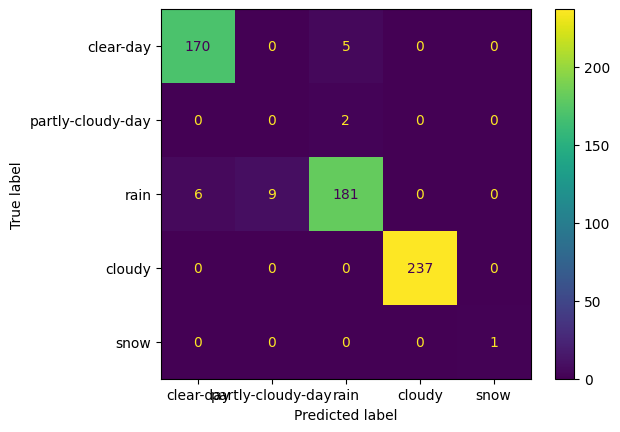

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler, SMOTE
import numpy as np

# Definir X (variables independientes)
X = df.drop(columns=["name","datetime","sunrise","sunset", "severerisk", "preciptype", "conditions", "description", "stations", "icon", "icono numero"], axis=1)

# Convertir y a una sola columna con valores categóricos
y = df["icono numero"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 #SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy="auto", k_neighbors=1, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de regresión logística multinomial
model = LogisticRegression(solver='lbfgs', max_iter=500, multi_class='multinomial')

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=df["icon"].unique())

plt.show()


In [12]:
# Creamos la función para ejecutar el modelo con nuevos datos 
nombre_caracteristica = [
 "tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", 
    "humidity", "precip", "precipprob", "precipcover", "snow", "snowdepth", "windgust", 
    "windspeed", "winddir", "sealevelpressure", "cloudcover", "visibility", 
    "solarradiation", "solarenergy", "uvindex", "moonphase"
    
]

    
# Función para predecir la clase de un animal
def predecir(caracteristicas):
    # Solita al usuario los datos del nuevo registro
    print("Introduce los datos del nuevo registro para predecir su clase:")
    valores = []
    for e in caracteristicas:
        r = float(input(f"Introduce {e}:"))
        valores.append(r)
    # Crear un DataFrame de pandas con los mismos nombres de columna
    X_new = pd.DataFrame([valores], columns=caracteristicas)

    # Realizar la predicción con el modelo
    y_new = model.predict(X_new)

    # Mostrar el resultado de la predicción
    if y_new == 0:
        print("Clear-day")
    elif y_new == 1:
        print("Partly-cloudy-day")
    elif y_new == 2:
        print("cloudy")
    elif y_new == 3:
        print("rain")
    else:
        print("snow")

predecir(nombre_caracteristica)


Introduce los datos del nuevo registro para predecir su clase:
Partly-cloudy-day


c:\Users\ia\Desktop\TrabajoTemperatura\.venv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
